In [2]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# this is the exercise:
# 1. Use iris flower dataset from sklearn library and try to form clusters of flowers using petal width and length features. Drop other two features for simplicity.
# 2. Figure out if any preprocessing such as scaling would help here
# 3. Draw elbow plot and from that figure out optimal value of k

In [3]:
dataset = sns.load_dataset('iris')
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
# here we do unsupervised ml so first we remove the 'species' column because 
df = dataset.copy()

In [6]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
df.drop(columns={'sepal_length', 'sepal_width', 'species'}, inplace=True)

In [8]:
df.columns

Index(['petal_length', 'petal_width'], dtype='object')

In [9]:
df.head()

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


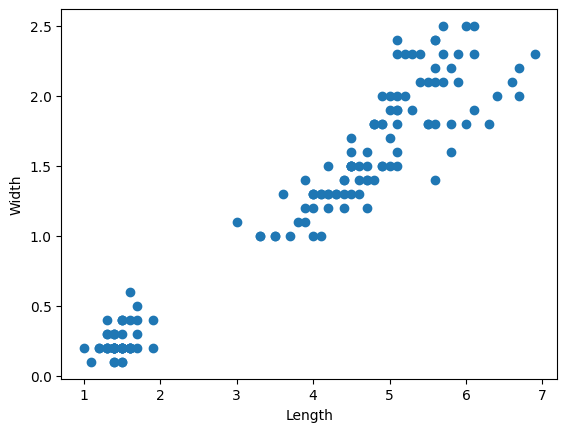

In [10]:
# let's display the data in scatter plot
plt.scatter(df.petal_length, df.petal_width)
plt.xlabel("Length")
plt.ylabel("Width")
plt.show()

In [11]:
k_mean = KMeans(n_clusters=3)
y_predict = k_mean.fit_predict(df[['petal_length', 'petal_width']])
y_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [18]:
# adding the new column 'cluster'
df['cluster'] = y_predict
df.head()

,petal_length,petal_width,cluster
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


In [19]:
# finding the center of each clusters
k_mean.cluster_centers_

array([[1.462     , 0.246     ],
       [5.59583333, 2.0375    ],
       [4.26923077, 1.34230769]])

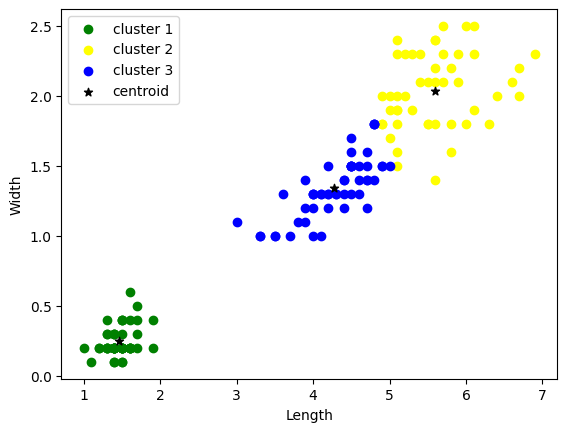

In [25]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.petal_length, df1.petal_width, color="green", label="cluster 1")
plt.scatter(df2.petal_length, df2.petal_width, color="yellow", label="cluster 2")
plt.scatter(df3.petal_length, df3.petal_width, color="blue", label="cluster 3")
plt.scatter(k_mean.cluster_centers_[:,0],k_mean.cluster_centers_[:,1],color='black',marker='*',label='centroid')

plt.xlabel("Length")
plt.ylabel("Width")
plt.legend()

In [13]:
# here we do preprocessing for grouping the data
scalar = MinMaxScaler()   # for scale 

scalar.fit(df[['petal_width']])
df['petal_width'] = scalar.transform(df[['petal_width']])

scalar.fit(df[['petal_length']])
df['petal_length'] = scalar.transform(df[['petal_length']])

In [31]:
df.head()

,petal_length,petal_width,cluster
0,0.067797,0.041667,0
1,0.067797,0.041667,0
2,0.050847,0.041667,0
3,0.084746,0.041667,0
4,0.067797,0.041667,0


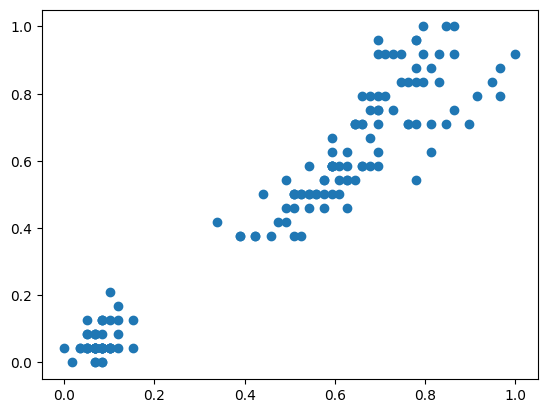

In [32]:
plt.scatter(df.petal_length, df.petal_width)

In [36]:
k_mean = KMeans(n_clusters=3)
y_predict = k_mean.fit_predict(df[['petal_length', 'petal_width']])
y_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [37]:
# adding the new column 'cluster'
df['cluster'] = y_predict
df.head()

,petal_length,petal_width,cluster
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1


In [38]:
k_mean.cluster_centers_

array([[0.7740113 , 0.81510417],
       [0.07830508, 0.06083333],
       [0.55867014, 0.51041667]])

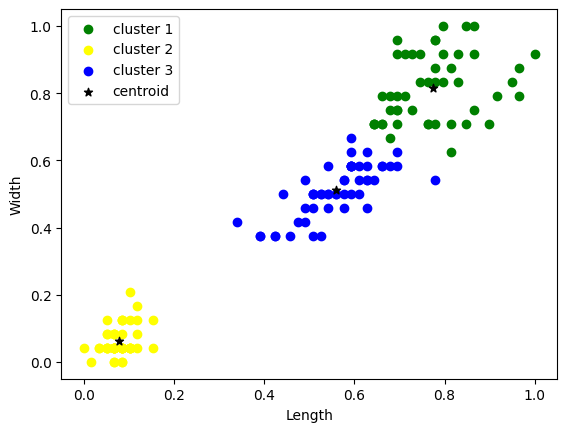

In [39]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.petal_length, df1.petal_width, color="green", label="cluster 1")
plt.scatter(df2.petal_length, df2.petal_width, color="yellow", label="cluster 2")
plt.scatter(df3.petal_length, df3.petal_width, color="blue", label="cluster 3")
plt.scatter(k_mean.cluster_centers_[:,0],k_mean.cluster_centers_[:,1],color='black',marker='*',label='centroid')

plt.xlabel("Length")
plt.ylabel("Width")
plt.legend()

# elbow plot

In [40]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    k_mean = KMeans(n_clusters=k)
    k_mean.fit(df[['petal_length','petal_width']])
    sse.append(k_mean.inertia_)

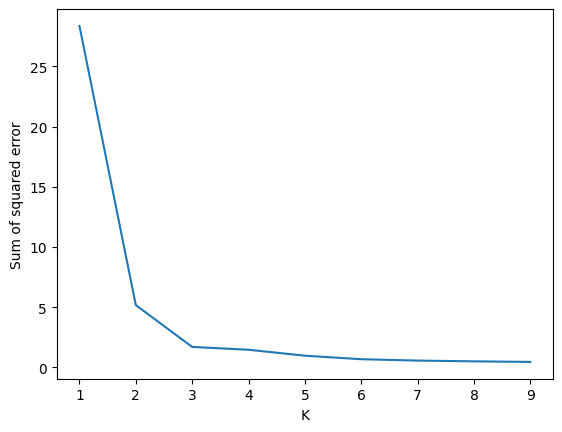

In [41]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)